AND

In [25]:
import numpy as np

def Perceptron(x:iter, w:iter, b):
    y = np.sum(w*x) + b
    if y <=0 :
        return 0
    else :
        return 1

In [28]:
def AND(x1: bool, x2: bool, *x: bool) -> int:
    X = np.array([x1, x2, *x])
    w = np.ones(len(X))  # 모든 가중치를 1로 설정
    b = 1 - len(X) -0.1  # 편향을 1-n로 설정
    return Perceptron(X, w, b)

AND 게이트의 목적과 맞는 결과가 나오도록 w,b의 값을 결정하는 것이 핵심

In [29]:
AND(True, True, True),AND(True,True, False ),\
AND(True, False, False),AND(False, False, False)

(1, 0, 0, 0)

NAND : 모두 1인 경우 0

In [32]:
def NAND(x1: bool, x2: bool, *x: bool) -> int:
    X = np.array([x1, x2, *x])
    w = -np.ones(len(X))  # 모든 가중치를 -1로 설정
    b = len(X) - 1 +0.1  # 편향을 n - 1로 설정
    return Perceptron(X, w, b)

In [33]:
NAND(True, True, True),NAND(True,True, False ),\
NAND(True, False, False),NAND(False, False, False)

(0, 1, 1, 1)

OR
- 하나라도 1이면 1

In [34]:
def OR(x1,x2,*x:bool):
    X = np.array([x1,x2,*x])
    w = np.ones(len(X))  # 모든 가중치를 1로 설정
    b = -0.1
    return Perceptron(X, w, b)

In [35]:
OR(True, True, True),OR(True,True, False ),\
OR(True, False, False),OR(False, False, False)

(1, 1, 1, 0)

그럼 XOR은?
- AND, NAND, OR 은 모두 같은 구조의 퍼셉트론이지만, XOR은 선을 그어 구분할 수가 없음

- 1966년 ALPAC 보고서에서 제시된 기계 번역의 한계와 함께 마빈 민스키의 Perceptrons(1969)가 지적한 퍼셉트론의 XOR 문제에 대한 한계는 1980년 대 초까지 이어진 인공지능의 겨울을 초래함
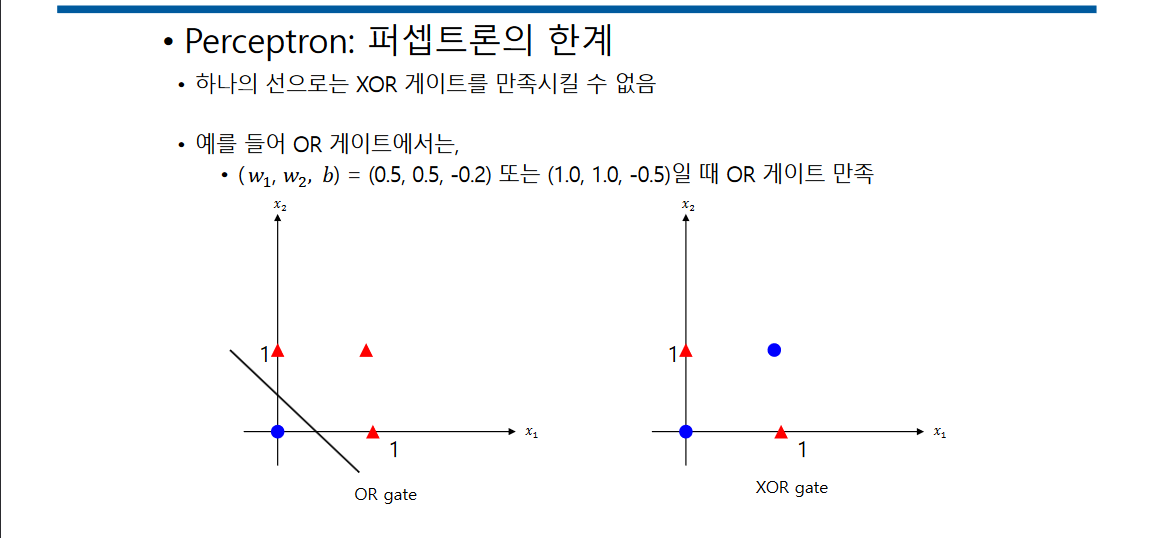

#### Perceptrom : MLP (Multy-Layer Perceptron)
- Perceptron이 단층이었다면, 층을 하나 더 쌓아서 Multi Layer Perceptron 을 만든다
- NAND와 OR의 결과를 입력으로 하며, AND 연산을 하는 XOR 게이트 구현
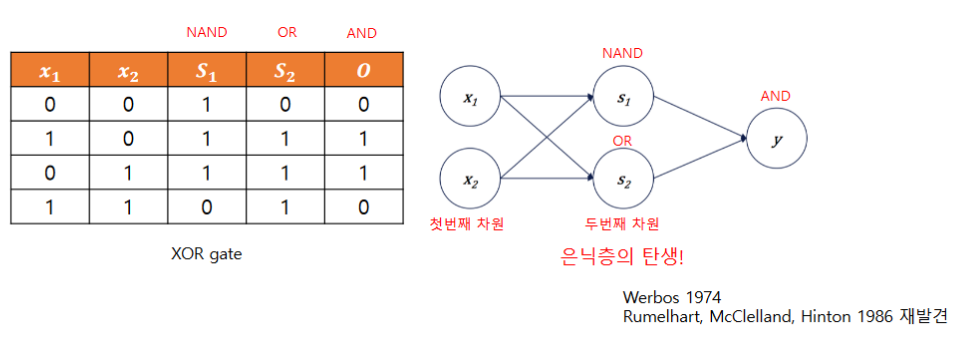

In [36]:
def XOR(x1: bool, x2: bool, *x: bool) -> int:
    if len(x) == 0:
        # 두 개의 입력만 있는 경우
        _nand = NAND(x1, x2)
        _or = OR(x1, x2)
        return AND(_nand, _or)
    else:
        # 여러 개의 입력이 있는 경우
        # 첫 두 개의 입력에 대해 XOR을 계산하고 나머지 입력에 대해 재귀 호출
        return XOR(XOR(x1, x2), *x)


In [37]:
XOR(True, True, True),XOR(True,True, False ),\
XOR(True, False, False),XOR(False, False, False)

(1, 0, 1, 0)

부동소수점 오류를 막기 위해 bias 값을 부여한다. 이거때문에 40분 날림 ㅠㅠ